<a href="https://colab.research.google.com/github/VincentDG/cs-198-brugada/blob/main/CS_198.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I - Importing Database and Visualizing Data

Main Reference: https://medium.com/@protobioengineering/how-to-get-heart-data-from-the-mit-bih-arrhythmia-database-e452d4bf7215

Installing wfdb

> Package used for accessing the database and visualizing data



In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 1.9 MB/s eta 0:00:00


**Mounting Database**



> Accessing the database from Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**CSV Importer**



> Imports a given patient record to CSV



In [ ]:
import wfdb
import csv

patient_record = wfdb.rdrecord("drive/MyDrive/mitdb-1.0.0.physionet.org/100")

# print(patient_record.__dict__)

# Extract patient info, lead names, and ECG data
patient_number = patient_record.record_name
leads = patient_record.sig_name
ecg_data = patient_record.p_signal

# Create CSV
filename = f"{patient_number}.csv"
outfile = open(filename, "w")
out_csv = csv.writer(outfile)

# Write CSV header with lead names
out_csv.writerow(leads)

# Write ECG data to CSV
for row in ecg_data:
    out_csv.writerow(row)

**Plot Test**
> Plots the ECG of a particular patient in MIT-BIH Arrhythmia database

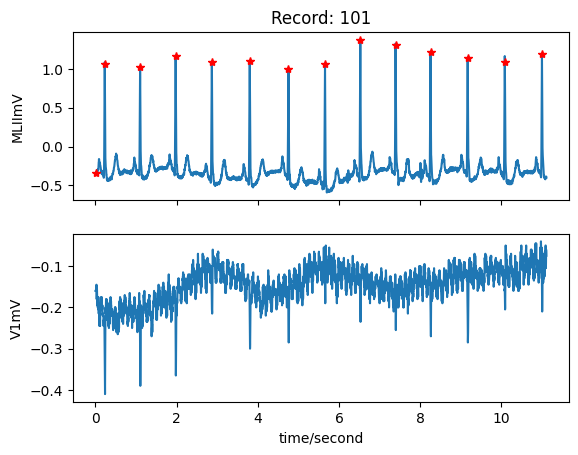

In [ ]:
patient_record = wfdb.rdrecord("drive/MyDrive/mitdb-1.0.0.physionet.org/101", sampfrom=0, sampto=4000,)
patient_annotation = wfdb.rdann("drive/MyDrive/mitdb-1.0.0.physionet.org/101", 'atr', sampfrom=0, sampto=4000, shift_samps=True)
wfdb.plot_wfdb(patient_record, patient_annotation) # plots the ECG

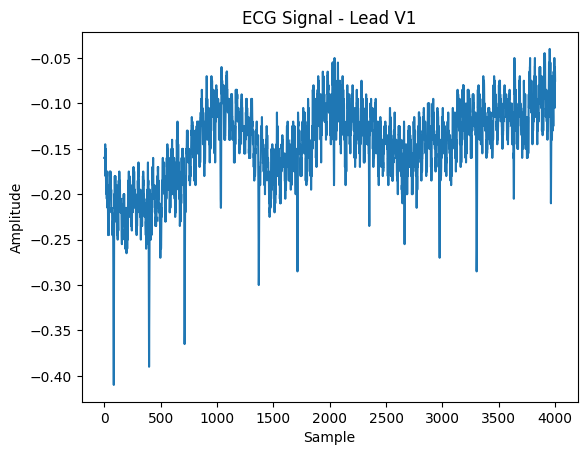

In [ ]:
from matplotlib import pyplot as plt

v0 = patient_record.p_signal[:, 0]
v1 = patient_record.p_signal[:, 1]


# Plot the second lead signal
plt.plot(v1)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('ECG Signal - Lead V1')
plt.show()

# II - Data Preprocessing

**References:**

*   https://www.section.io/engineering-education/wavelet-transform-analysis-of-1d-signals-using-python/

*   https://pywavelets.readthedocs.io/en/0.2.2/ref/dwt-discrete-wavelet-transform.html


* https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise_wavelet.html


### Imports

**Installing necessary packages**


> Installs numpy, pywavelet, matplotlib and scikit-image onto Google Colab

In [ ]:
# For numpy package.
!pip install numpy

# For pywavelet package.
!pip install PyWavelets

# For matplotlib
!pip install matplotlib

# Install scikit-image
!pip install -U scikit-image

!pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.6 MB/s eta 0:00:00


**Importing necessary packages**
> Imports numpy, PyWave, Denoise_Wavelet, and Pyplot onto Google Colab program

In [ ]:
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
from scipy import signal

## MIT-BIH Arrhythmia data

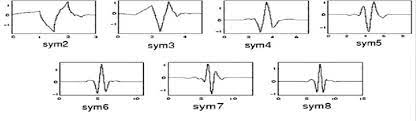

### Savitzky-Golay Filters

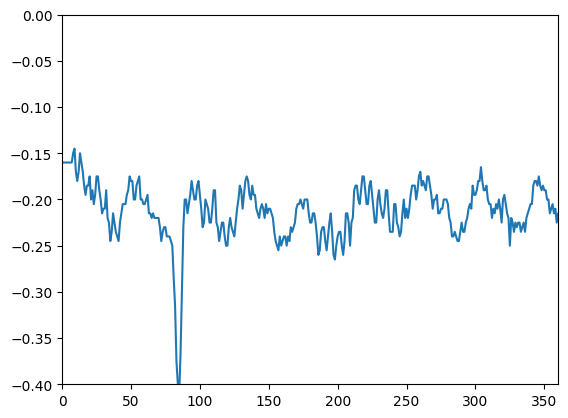

In [ ]:
# plt.figure(figsize=(20, 10), dpi=100)\
plt.figure()
plt.plot(v1)
plt.axis([0, 360,-0.4, 0])
plt.show()

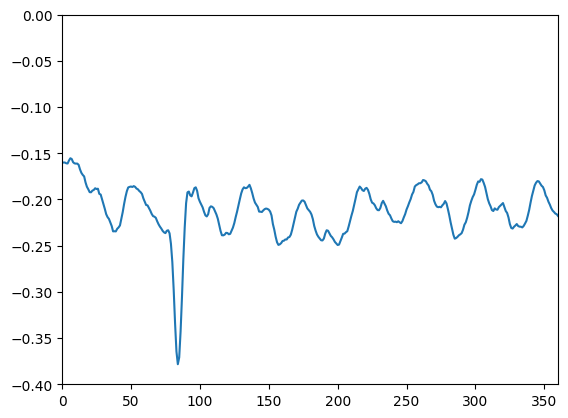

In [ ]:
wave1 = signal.savgol_filter(v1, window_length=11, polyorder=3, mode="nearest")
# plt.figure(figsize=(20, 10), dpi=100)
plt.figure()
plt.plot(wave1)
plt.axis([0, 360,-0.4, 0])
plt.show()

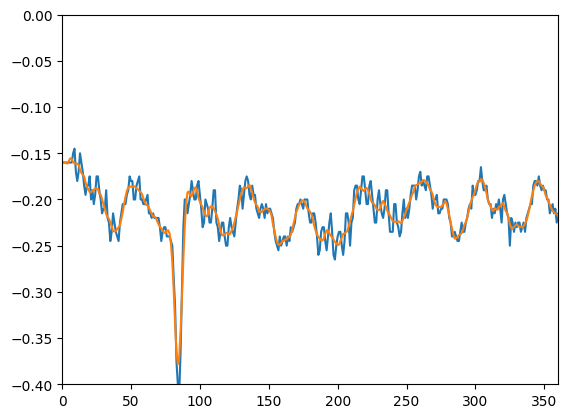

In [ ]:
plt.figure()
plt.plot(v1)
plt.plot(wave1)
plt.axis([0, 360,-0.4, 0])
plt.show()

# III - Printing in Standard ECG Format

ECG Format:
1. Grid Size
 - Each large square represents 1x1 cm
 - Divided into five small squares (0.2 cm)

2. Paper Speed
 - 25 mm/s
 - distance between two consecutive vertical gridlines (1 second) is 25mm

3. Voltage Calibration
 - The standard calibration is 10 mm/mV in the vertical direction.
 - Each small square in the vertical direction represents 0.1 mV (0.5 mm) and each large square represents 0.5 mV (2.5 mm).

4. Time Calibration:
 - Each small square in the horizontal direction represents 0.04 seconds (40 milliseconds).
 - Each large square in the horizontal direction represents 0.2 seconds (200 milliseconds or one-fifth of a second).

5. Gridlines:
 - Bold lines are used to denote each second (vertical gridlines) and each 0.2 seconds (horizontal gridlines).
 - Fainter lines, often dotted or dashed, divide the large squares into the smaller 0.04-second intervals.

6. Lead Labels and Patient Information:
 - Typically, there are areas on the ECG paper to record patient information, lead labels, and calibration information.

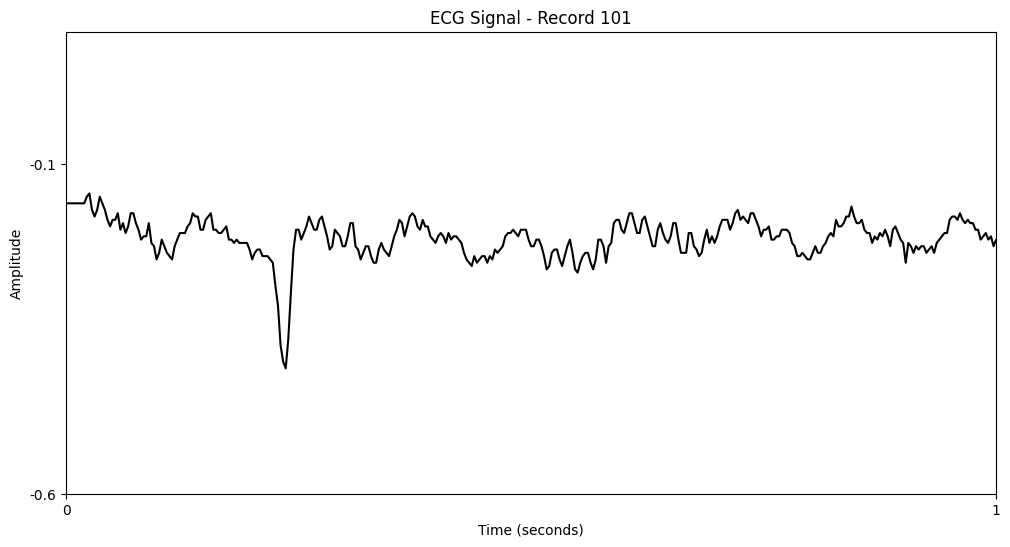

In [ ]:
# Function to plot ECG signal with gridlines
def plot_ecg(signal, start_time, end_time, title="ECG Signal", fs=360.0):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Calculate time axis
    time = np.arange(0, len(signal)) / fs

    # Plot the ECG signal
    plt.plot(time, signal, color='black')

   # Customize grid spacing
    plt.xticks(np.arange(0, max(time), 1))

    # Set labels and title
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title(title)

    # Set the x-axis limits to display only the specified portion
    ax.set_xlim(start_time, end_time)

    # Customize y-axis ticks and labels
    y_lower = -0.6
    y_upper = 0.1

    y_ticks = np.arange(y_lower, y_upper, 0.5)  # Customize based on your specific requirements
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f"{tick:.1f}" for tick in y_ticks])  # Format labels with one decimal place

    # Set the y-axis limits
    ax.set_ylim(y_lower, y_upper)  # Customize based on your specific requirements

    # Show the plot
    plt.show()

# Load the MIT-BIH Arrhythmia database record
record_name = "101"  # Change this to the record you want to visualize
signal = patient_record.p_signal[:, 0]  # Take the first lead for simplicity

# Plot the ECG signal
plot_ecg(v1, 0, 1, title=f"ECG Signal - Record {record_name}")

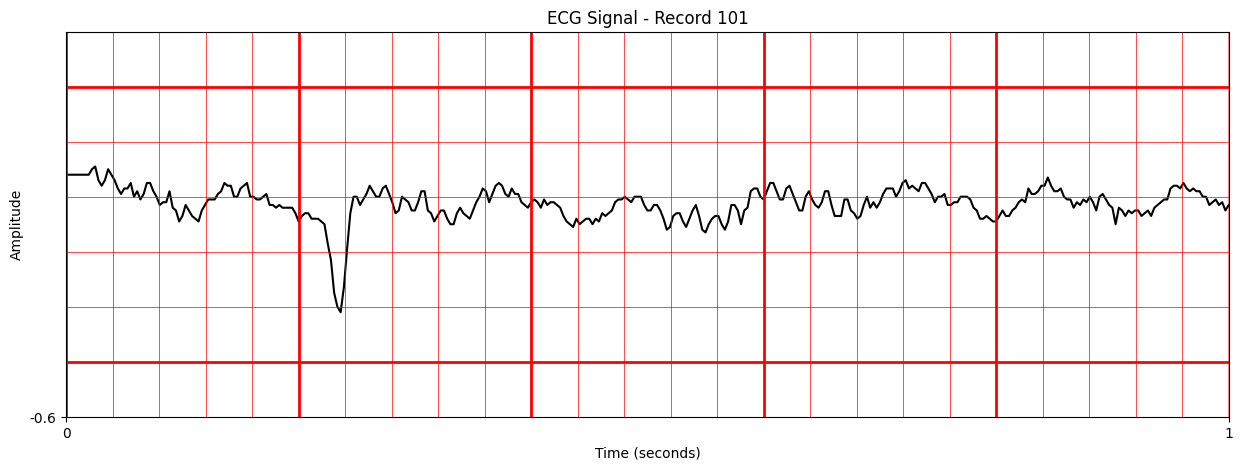

In [ ]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to plot ECG signal with gridlines
def plot_ecg(signal, start_time, end_time, title="ECG Signal", fs=360.0):
    fig, ax = plt.subplots(figsize=(15, 5))

    # Calculate time axis
    time = np.arange(0, len(signal)) / fs

    # Plot the ECG signal
    plt.plot(time, signal, color='black')

    # Add gridlines following the standard format
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='red', alpha=0.5)
    plt.grid(True, which='major', axis='x', linestyle='-', linewidth=2, color='red')

   # Customize grid spacing
    plt.xticks(np.arange(0, max(time), 1))
    plt.grid(True, which='minor', axis='x', linestyle='--', linewidth=0.5, color='red', alpha=0.5)
    # plt.minorticks_on()
    # plt.grid(True, which='minor', axis='x', linestyle='--', linewidth=0.5, color='red', alpha=0.5)

    # Add a thin red vertical line every 0.04 seconds
    thin_red_line_x_values = np.arange(start_time, end_time, 0.04)
    for x_value in thin_red_line_x_values:
        ax.axvline(x=x_value, color='red', linewidth=0.5)


    # Add a thick red vertical line every 0.2 seconds
    red_line_x_values = np.arange(start_time, end_time, 0.2)
    for x_value in red_line_x_values:
        ax.axvline(x=x_value, color='red', linewidth=2)

    # Set labels and title
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title(title)

    # Set the x-axis limits to display only the specified portion
    ax.set_xlim(start_time, end_time)

    # Customize y-axis ticks and labels
    y_lower = -0.6
    y_upper = 0.1

    y_ticks = np.arange(y_lower, y_upper, 1)  # Customize based on your specific requirements
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f"{tick:.1f}" for tick in y_ticks])  # Format labels with one decimal place

    # Set the y-axis limits
    ax.set_ylim(y_lower, y_upper)

    # Add a thin red line every 0.1 mV
    thin_red_line_y_values = np.arange(-5.0, 5.1, 0.1)
    for y_value in thin_red_line_y_values:
        ax.axhline(y=y_value, color='red', linewidth=0.5)

    # Add a thick red line every 0.5 mV
    red_line_y_values = np.arange(-5.0, 5.1, 0.5)
    for y_value in red_line_y_values:
        ax.axhline(y=y_value, color='red', linewidth=2)


    # Show the plot
    plt.show()

# Load the MIT-BIH Arrhythmia database record
record_name = "101"  # Change this to the record you want to visualize
signal = patient_record.p_signal[:, 0]  # Take the first lead for simplicity

# Plot the ECG signal
plot_ecg(v1, 0, 1, title=f"ECG Signal - Record {record_name}")

# IV - Segmentation

## Savitzky-Golay Derivative Analysis

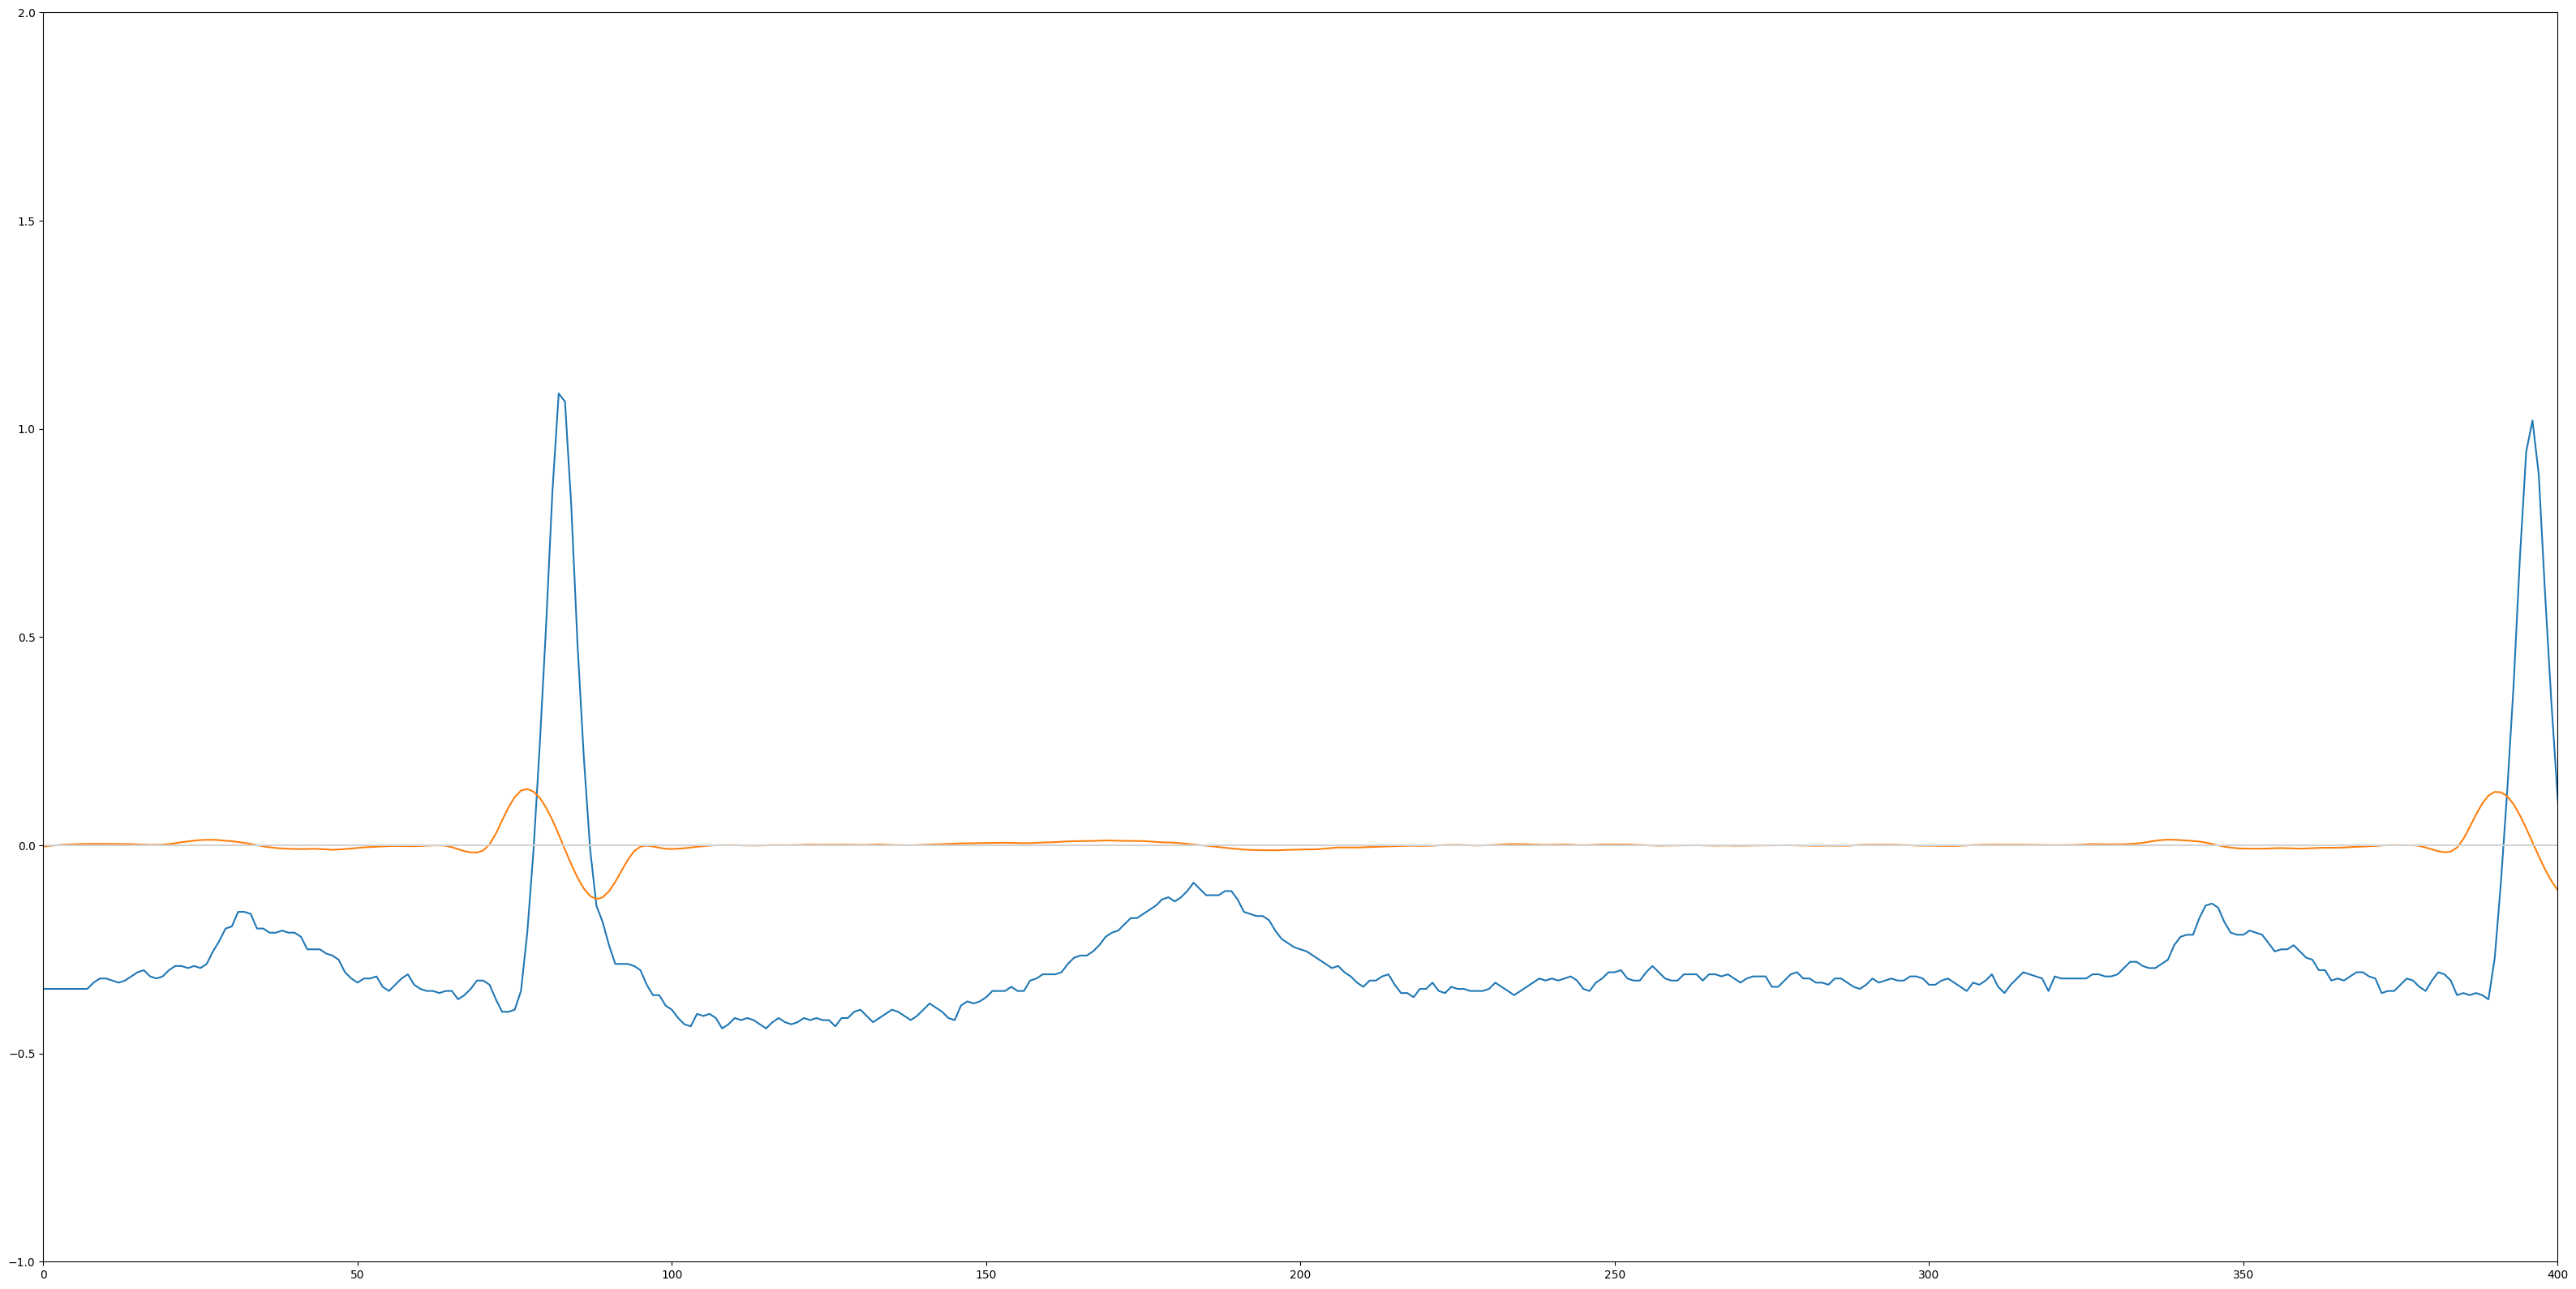

In [ ]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import neurokit2 as nk
from scipy import signal


patient_record2 = wfdb.rdrecord("drive/MyDrive/mit-bih-long-term-ecg-database-1.0.0/14046", sampto=4000,)
w0 = patient_record2.p_signal[:, 0]

d1 = signal.savgol_filter(v0, 25, polyorder = 4, deriv=1)
d2 = signal.savgol_filter(v0, 25, polyorder = 4, deriv=2)
plt.figure(figsize=(40, 20), dpi=100)
plt.plot(v0)
plt.plot(d1)
plt.axhline(y=0,color='lightgray', linestyle = '-')
plt.axis([0, 400,-1, 2])
plt.show()

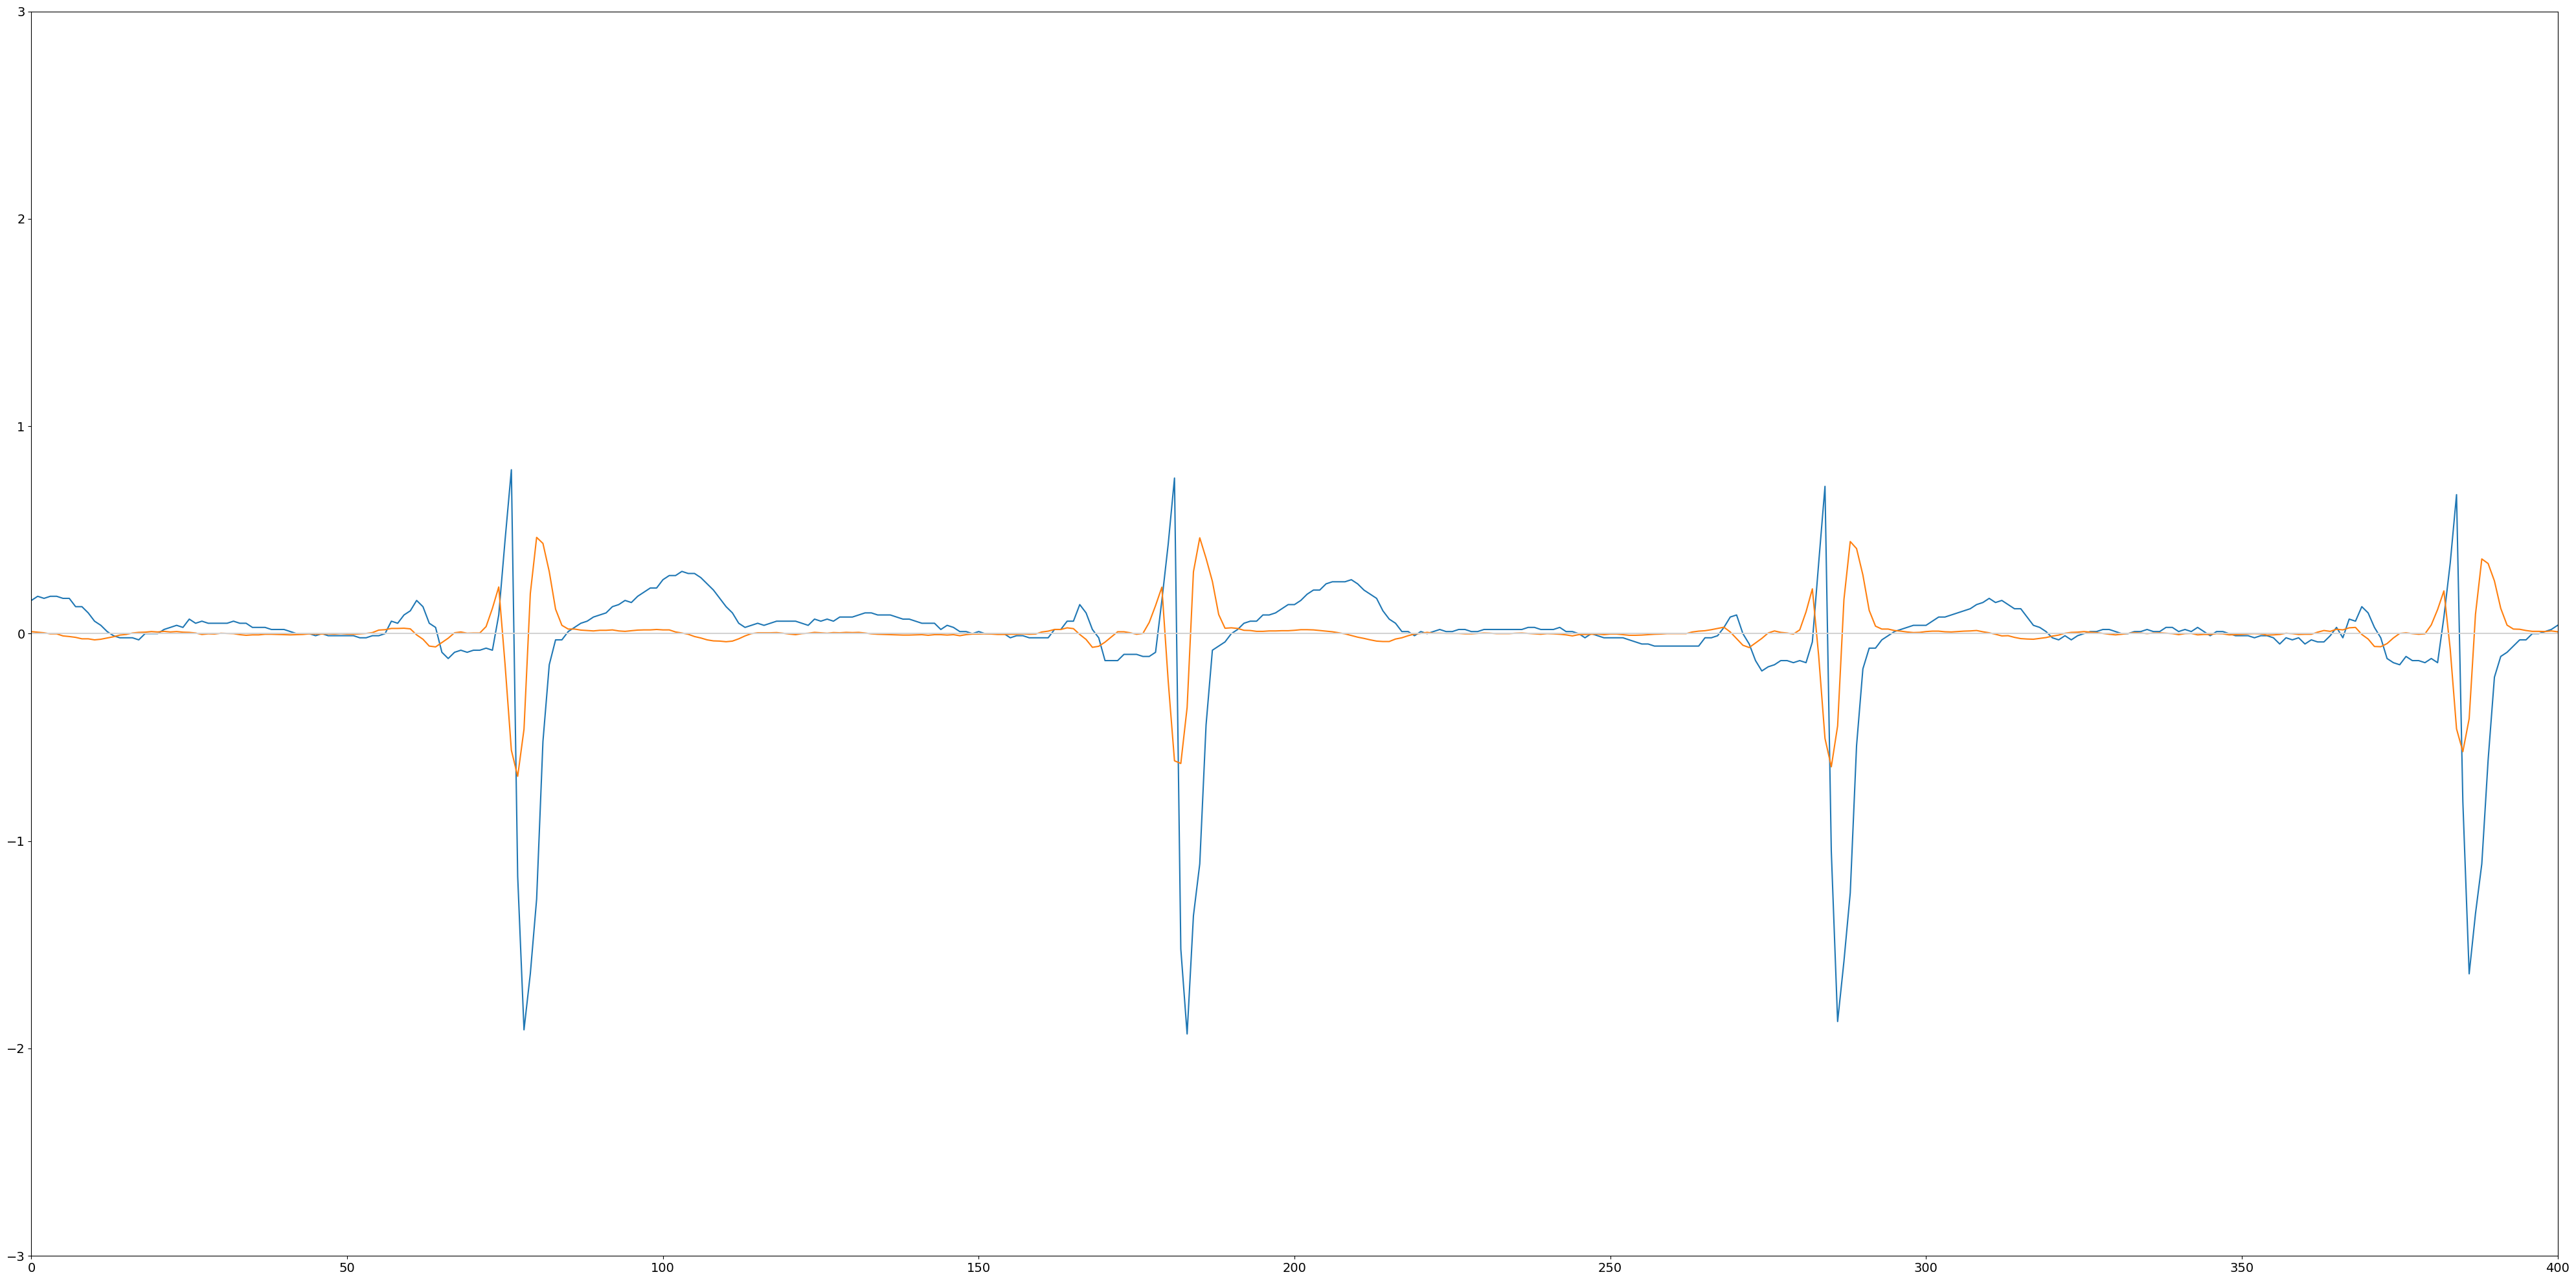

0.16

In [ ]:
de1 = signal.savgol_filter(w0, 5, polyorder = 2, deriv=1)
plt.figure(figsize=(40, 20), dpi=100)
plt.plot(w0)
plt.plot(de1)
plt.axhline(y=0,color='lightgray', linestyle = '-')
plt.axis([0, 400,-3, 3])
plt.show()
w0[0]

 For a window size of 25 and a polynomial order of 4:

 Both P and T waves have the  hill-like characteristic, and from the Savitzky-Golay Derivatives generated, it can be seen that the P wave's derivative starts positive, goes to 0 on the peak, and then goes to negative. This structure is similar to the T wave, except that the T wave is bigger, which means the derivative is much wider compared to the P wave. These characteristics in the derivative could be used for identification.

 However, the Savitzky-Golay derivative was inaccurate in calculating the derivatives at the QRS complex, with the R peak being at a negative derivative instead of 0. This could be caused by the number of polynomials used for approximation or the window size.

 The S point however, had the correct derivative, with a negative to 0 to positive for the downward spike structure.

For a window size of 5 and a polynomial order of 2:

It was able to capture the derivative of the R-peak, which is an improvement from the earlier parameters. This shows that the window size could be the issue, which made the filter ignore the R peak.

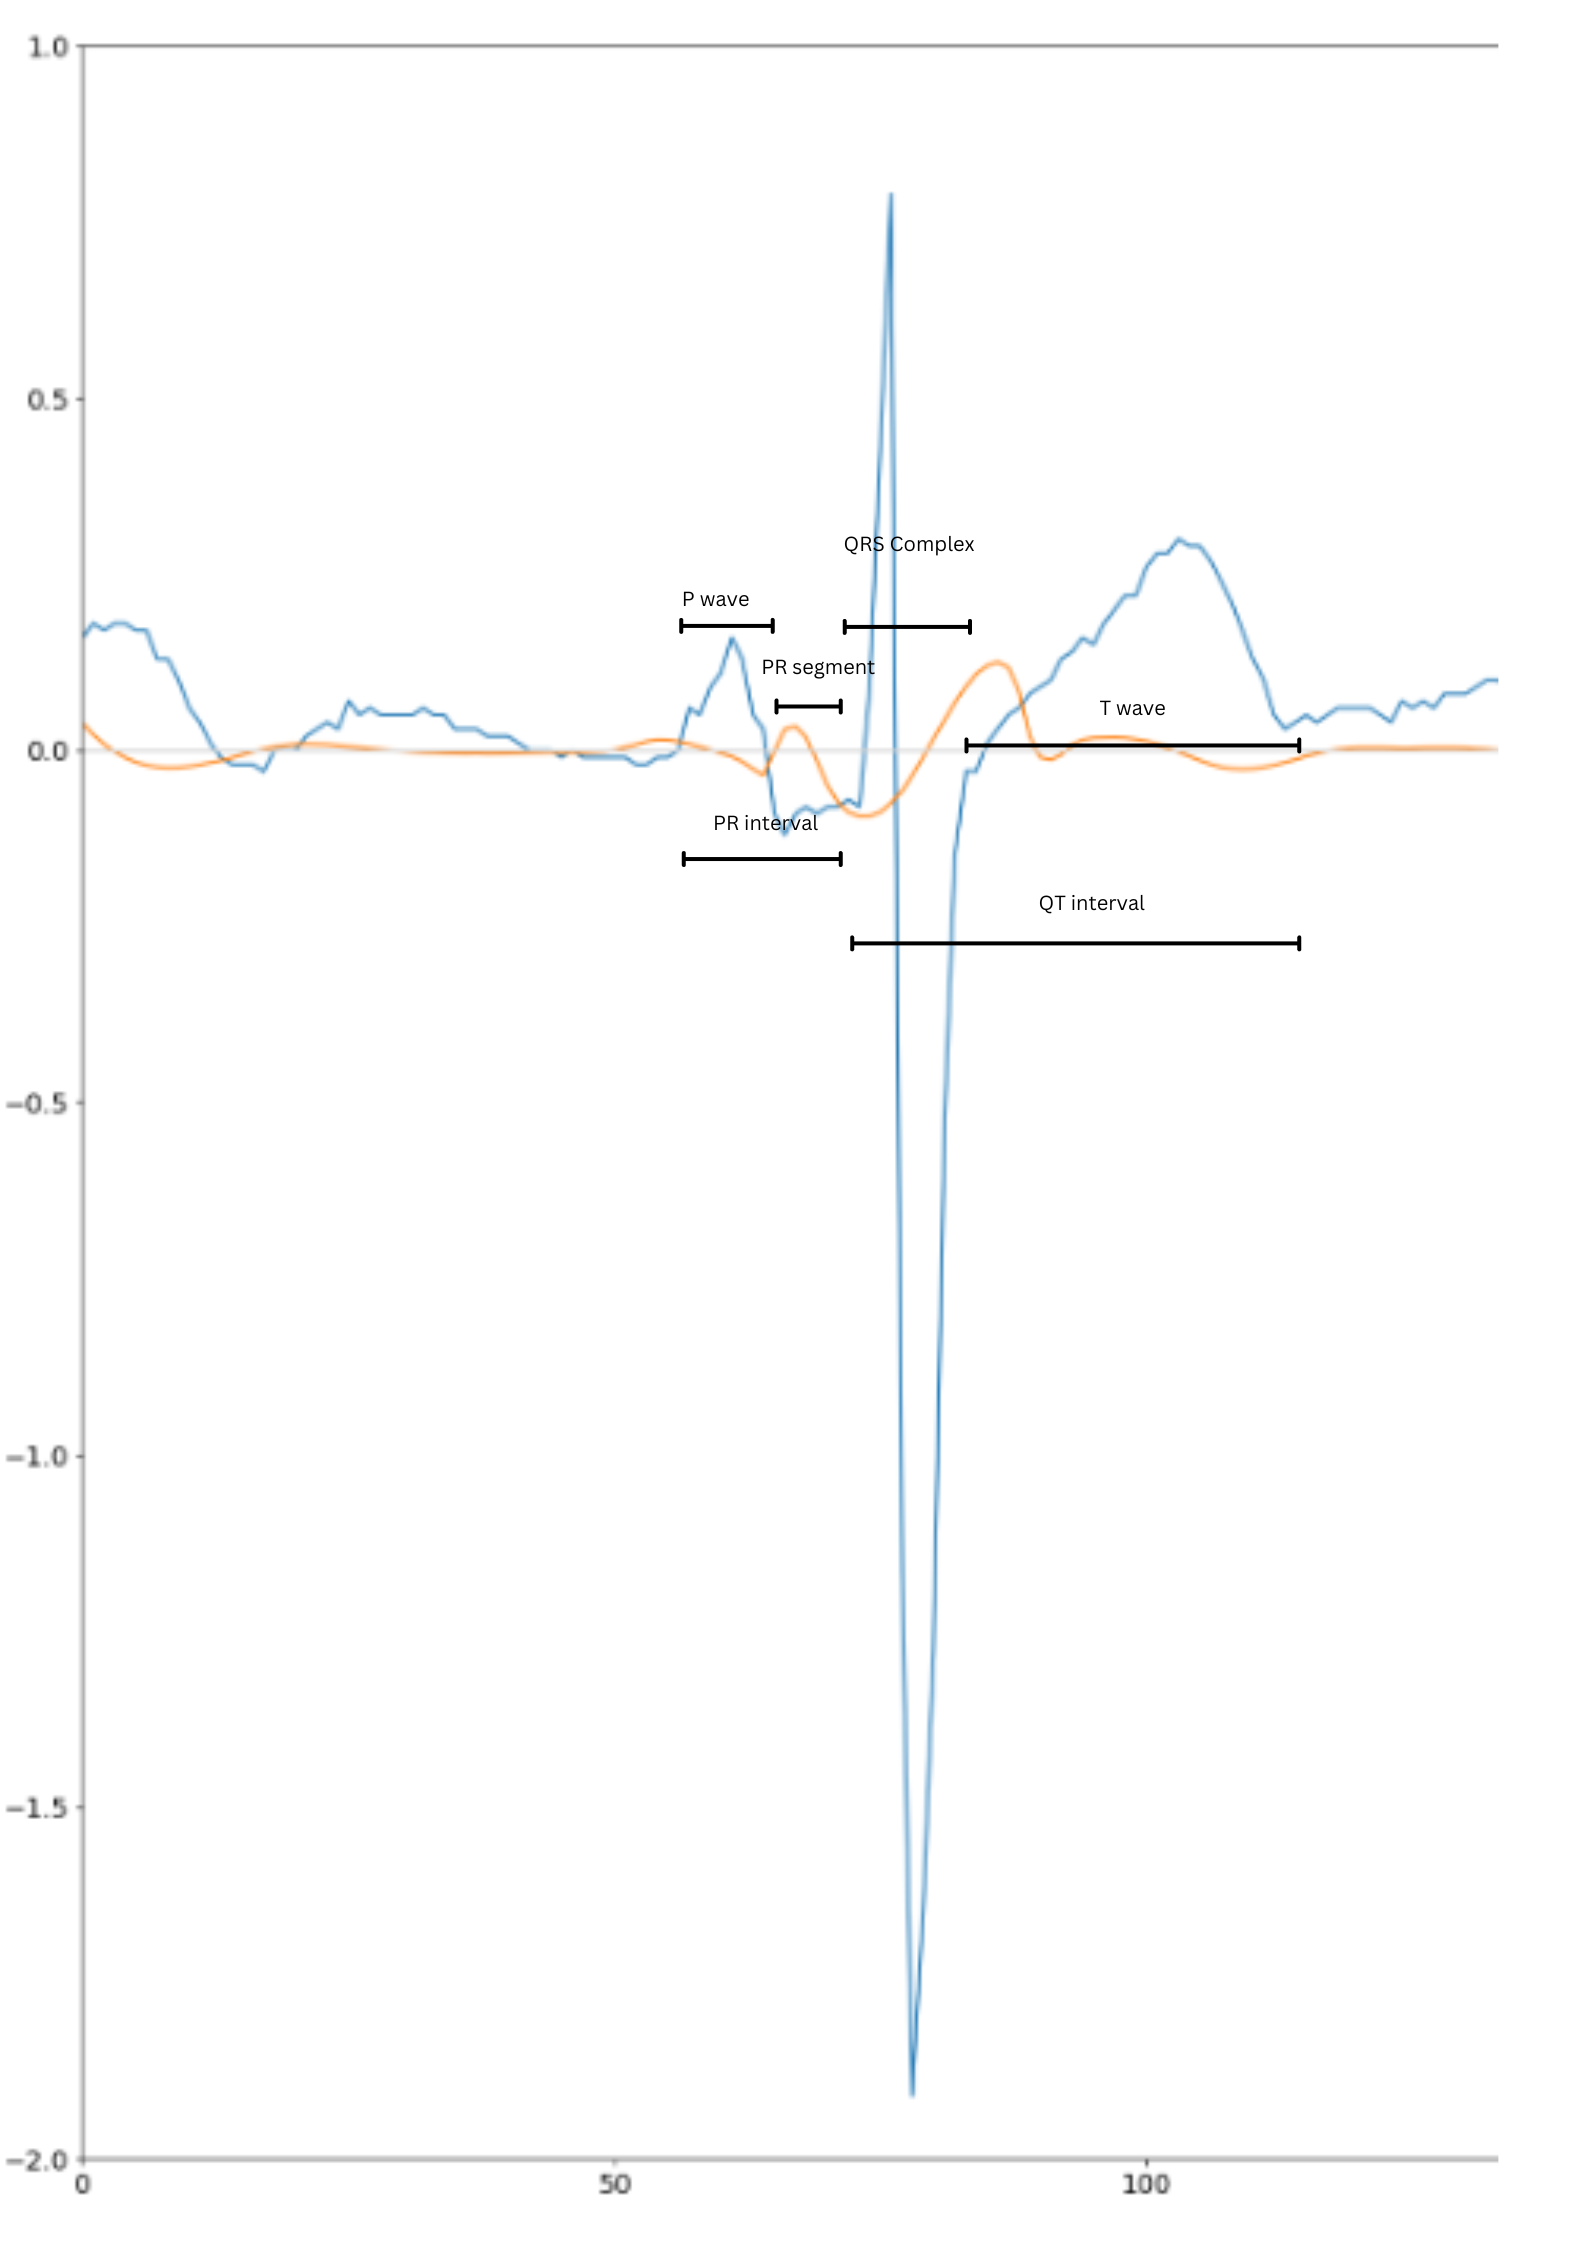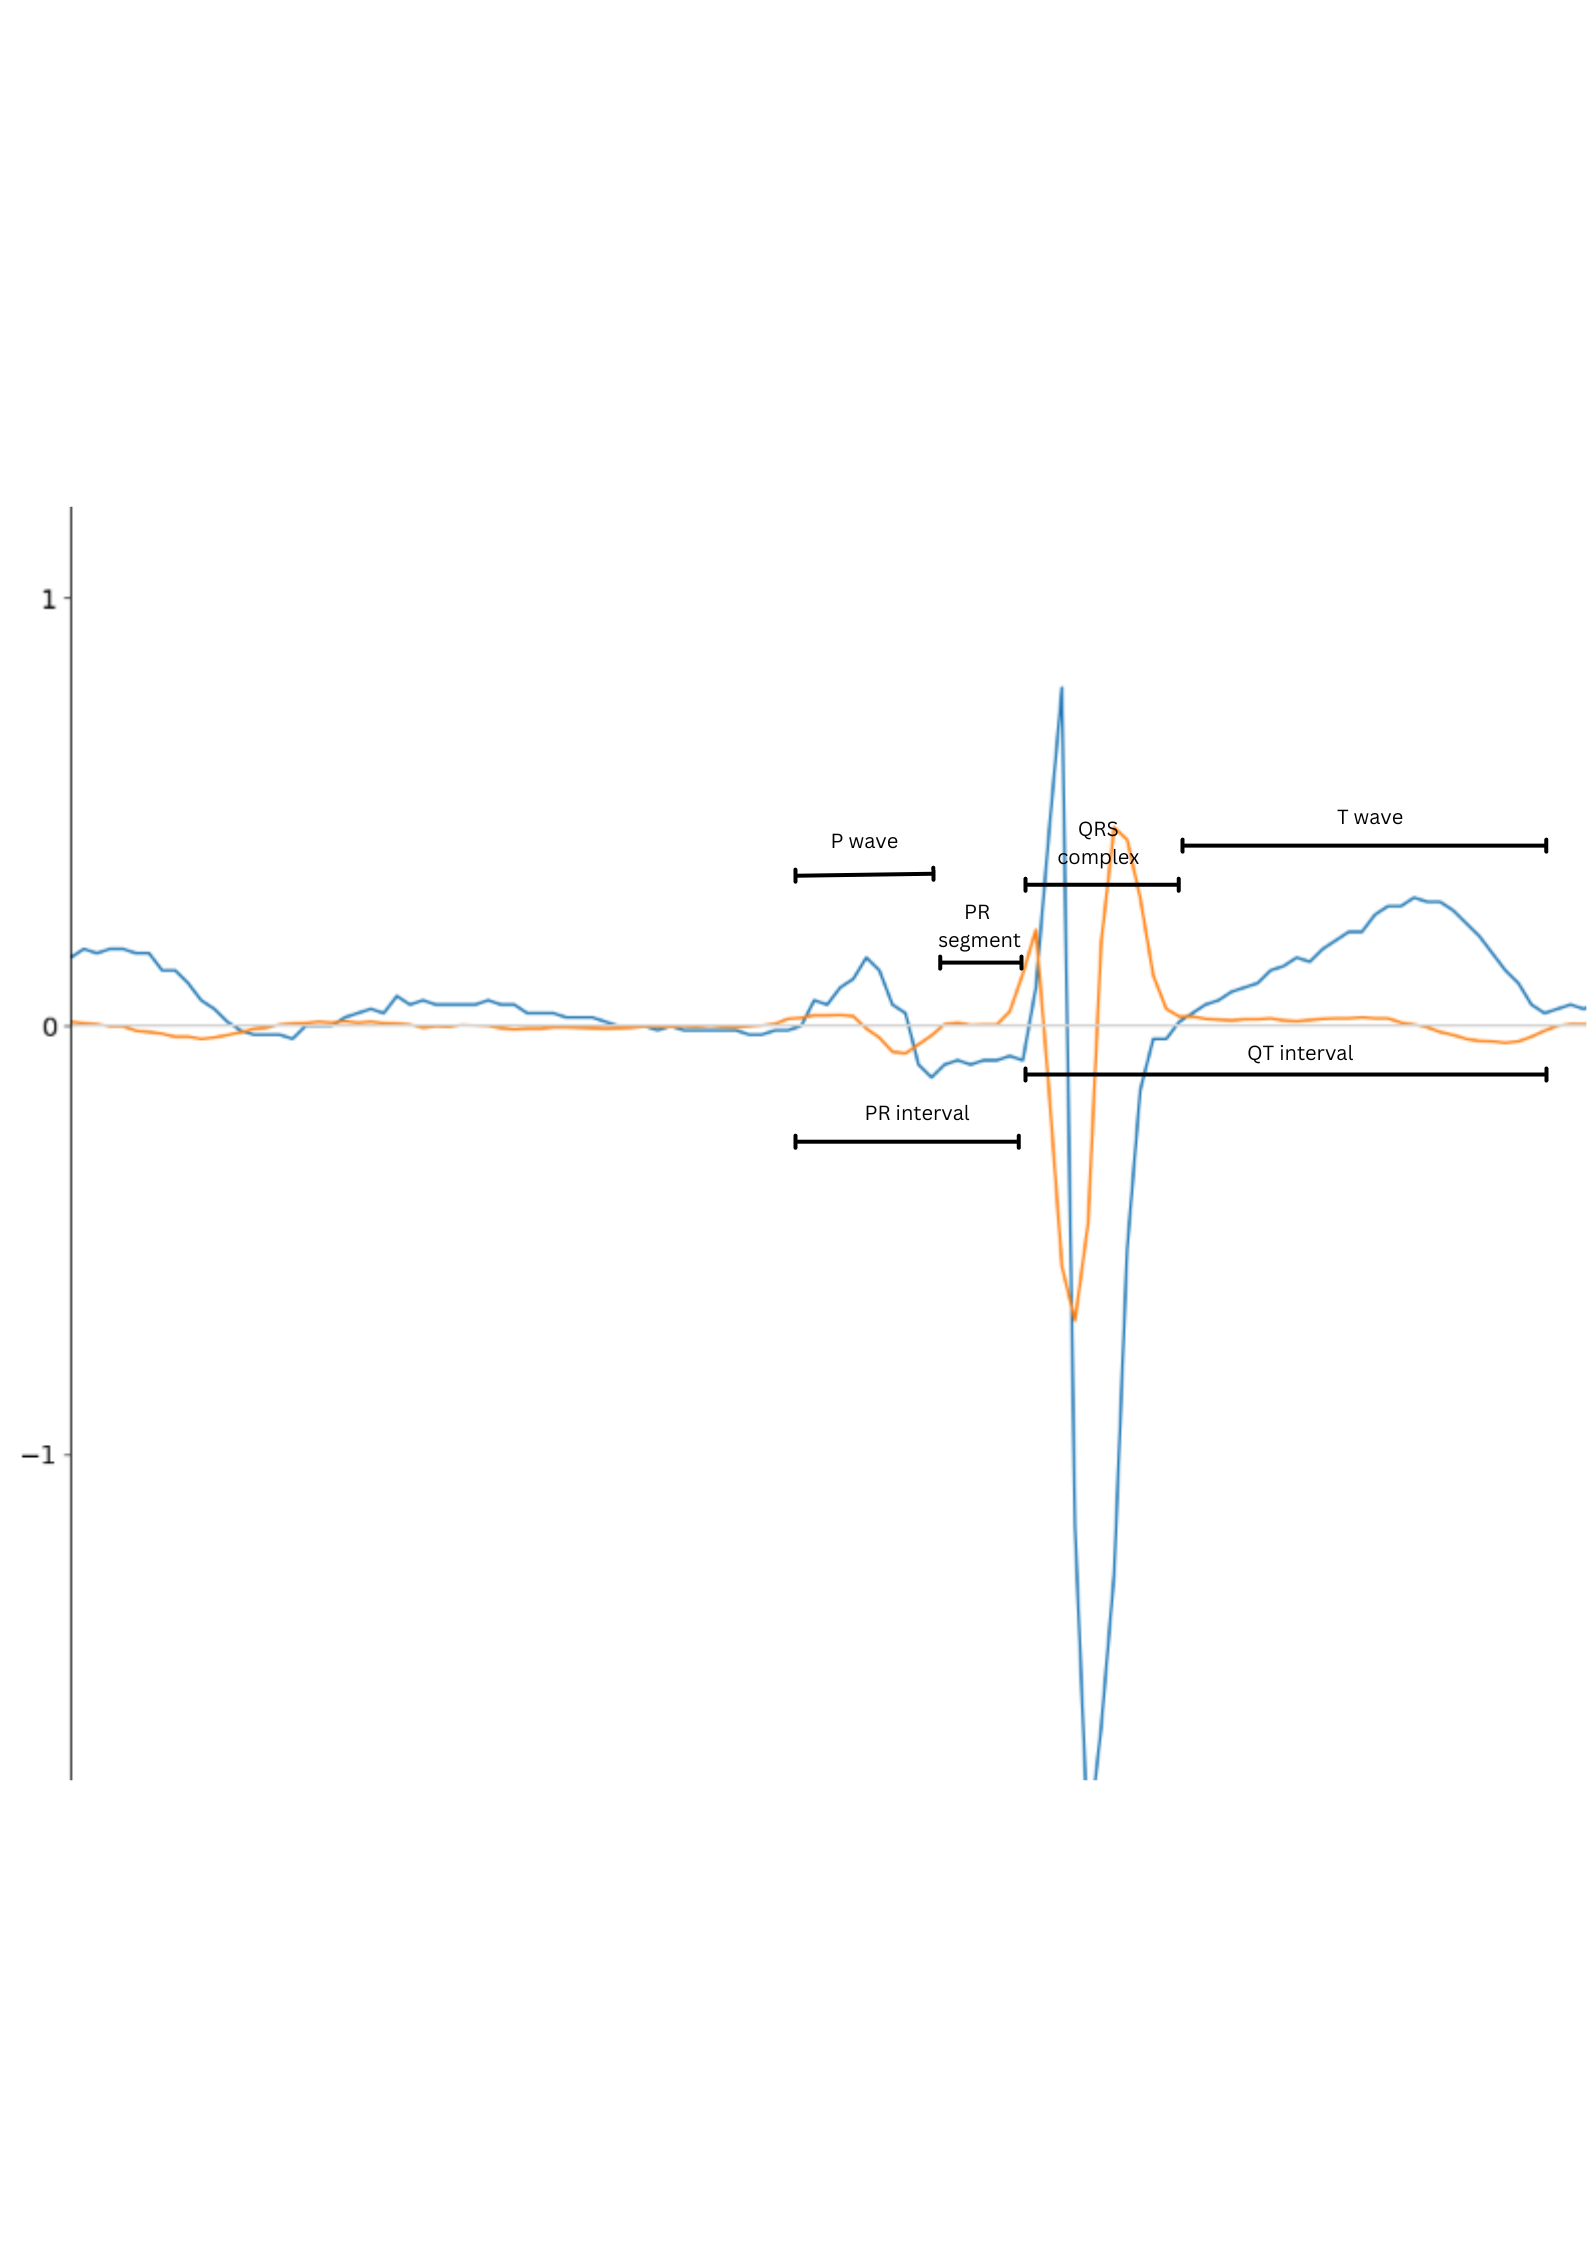

The angles were calculated for a sample interval of 1, that is the angle between sample i and sample i + 1 was taken.

For example, if sample 0 had a value of 0.02217704 and sample 1 had a value of 0.03835086, then the angle is calculated as follow:

tan(theta) = (0.02217704-0.03835086)/(1-0), where theta-180 is angle 0

In [ ]:
degrees = np.zeros(len(de1))
radians = np.zeros(len(de1))
interval = 1
num_intervals = len(de1) // interval

for i in range(num_intervals - 1):
  start_index = i * interval
  end_index = (i+1) * interval

  delta_x = end_index - start_index
  delta_y = de1[(i+1)* interval] - de1[i * interval]
  angle_radians = np.arctan2(delta_y,delta_x)
  angle_degrees = np.degrees(angle_radians)
  degrees[i] = angle_degrees
  radians[i] = angle_radians


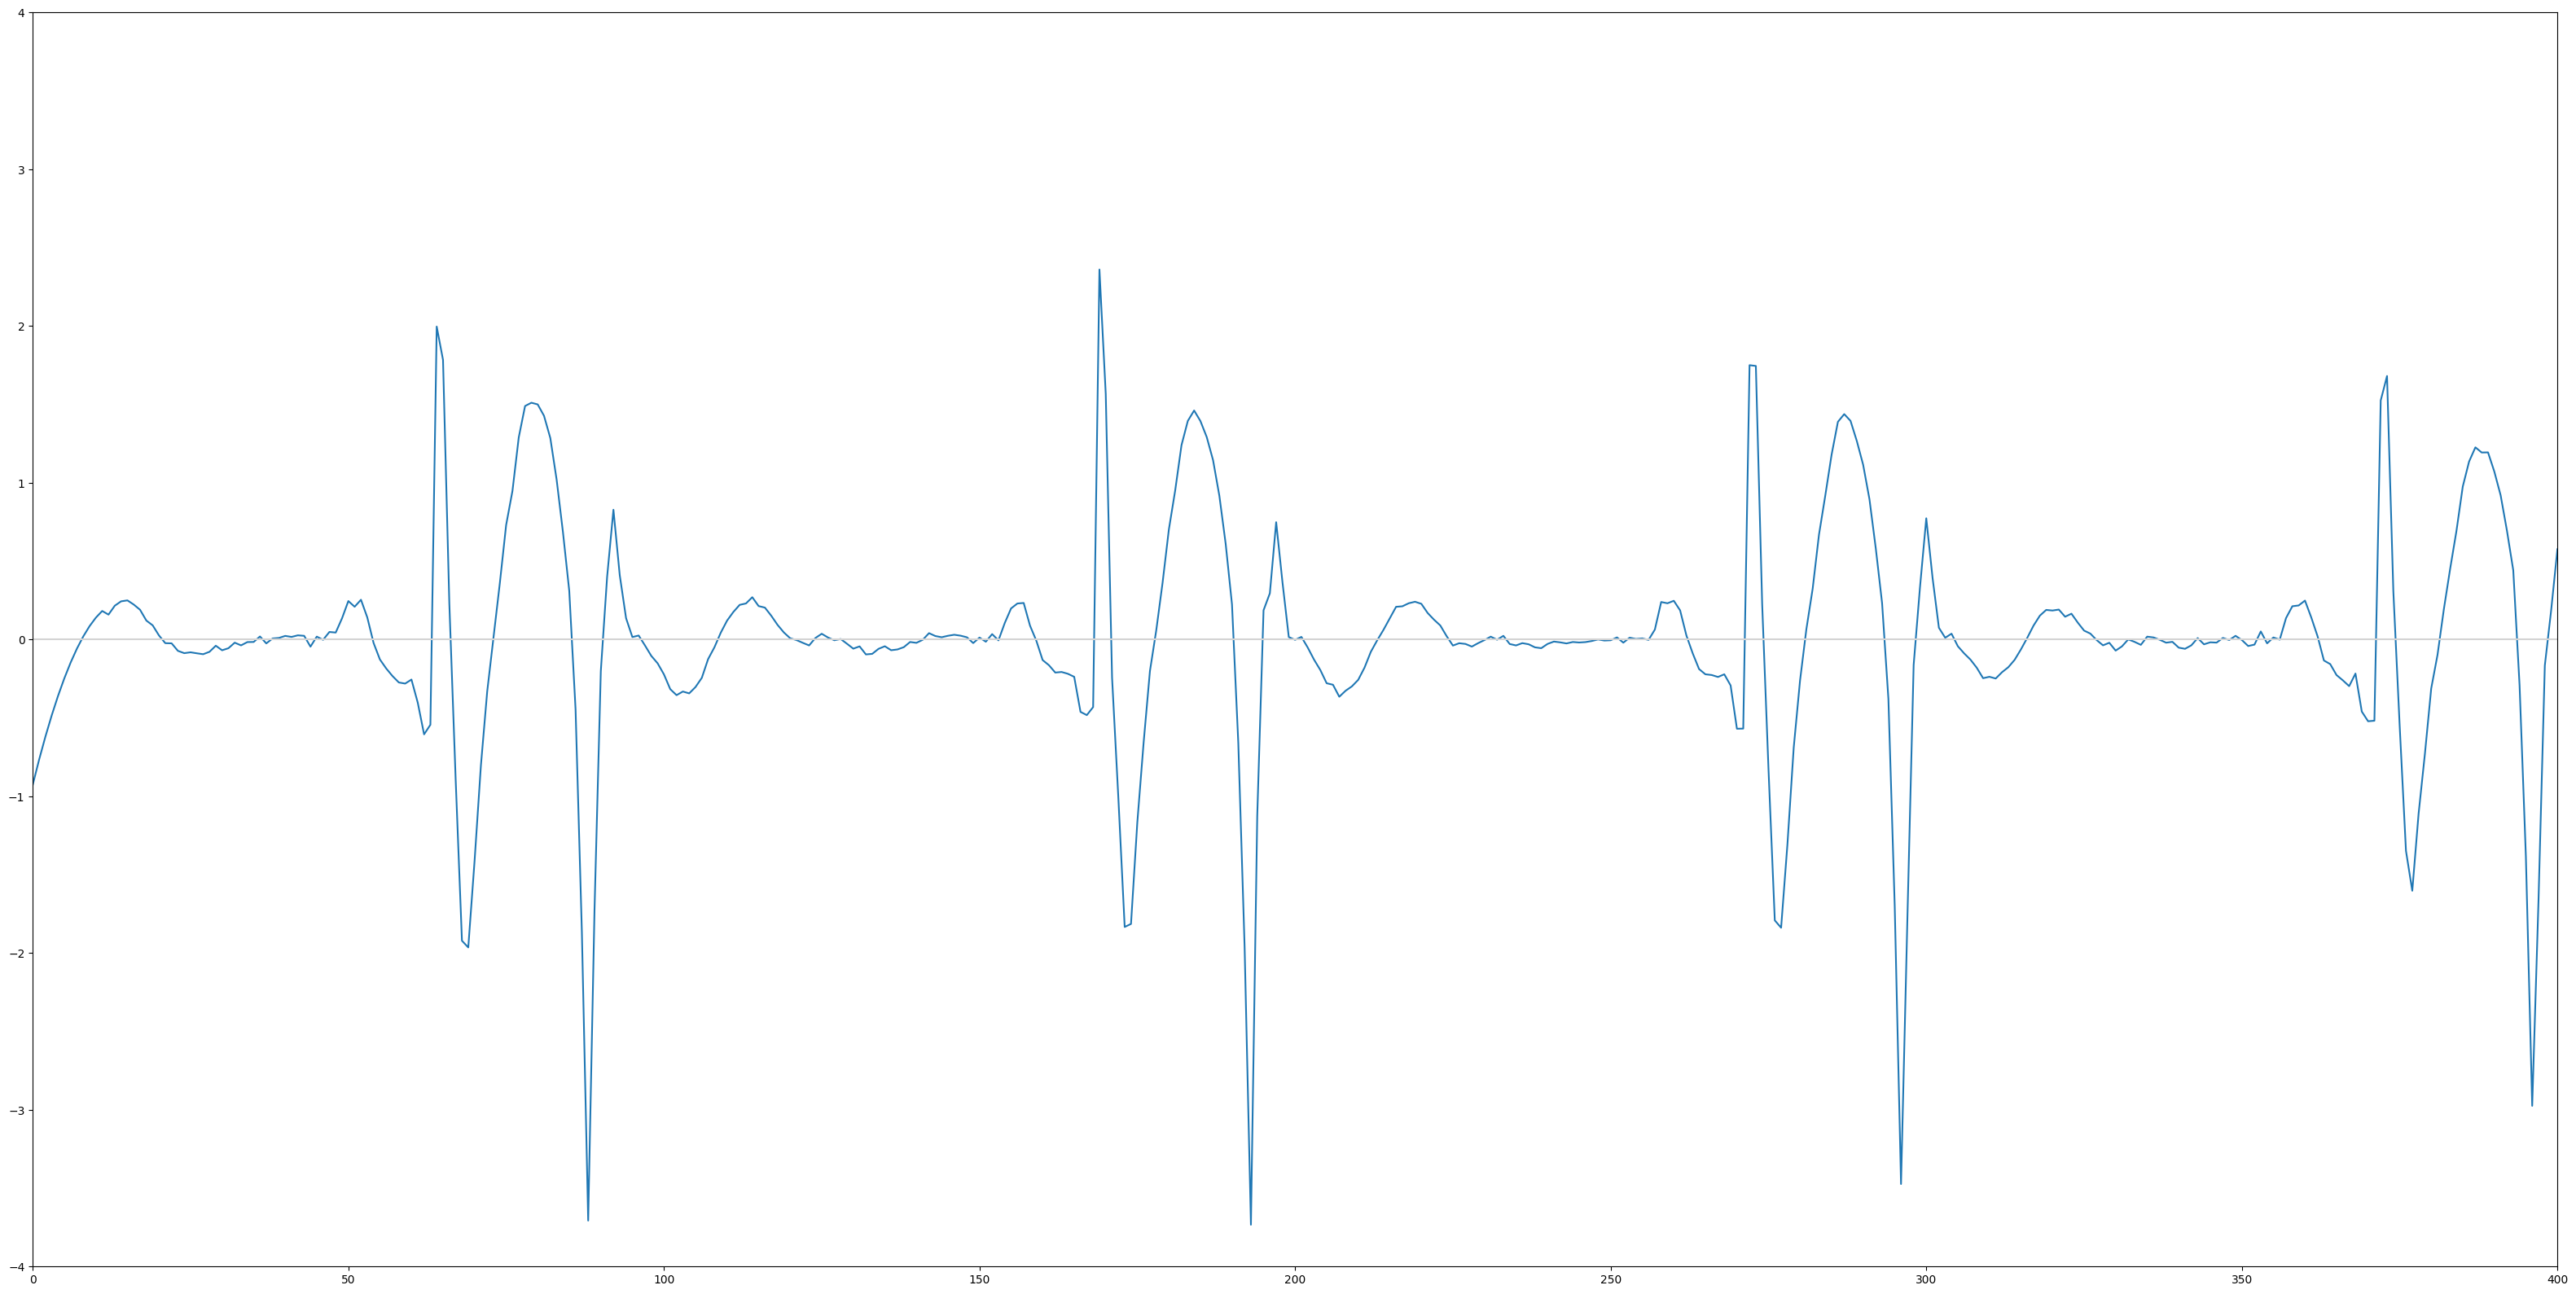

In [ ]:
plt.figure(figsize=(40, 20), dpi=100)

plt.plot(degrees)
plt.axhline(y=0,color='lightgray', linestyle = '-')

plt.axis([0, 400,-4, 4])
plt.show()

### Plotting the Significant Slopes of the First Derivative



#### Implementation

[[(55, 0.014775396101483063), (63, -0.026505512201164382)], [(63, -0.026505512201164382), (77, -0.058068488677184386)], [(77, -0.058068488677184386), (84, 0.10812181457833636)], [(84, 0.10812181457833636), (113, -0.017113109917457753)], [(113, -0.017113109917457753), (147, -0.004919169397430271)]]


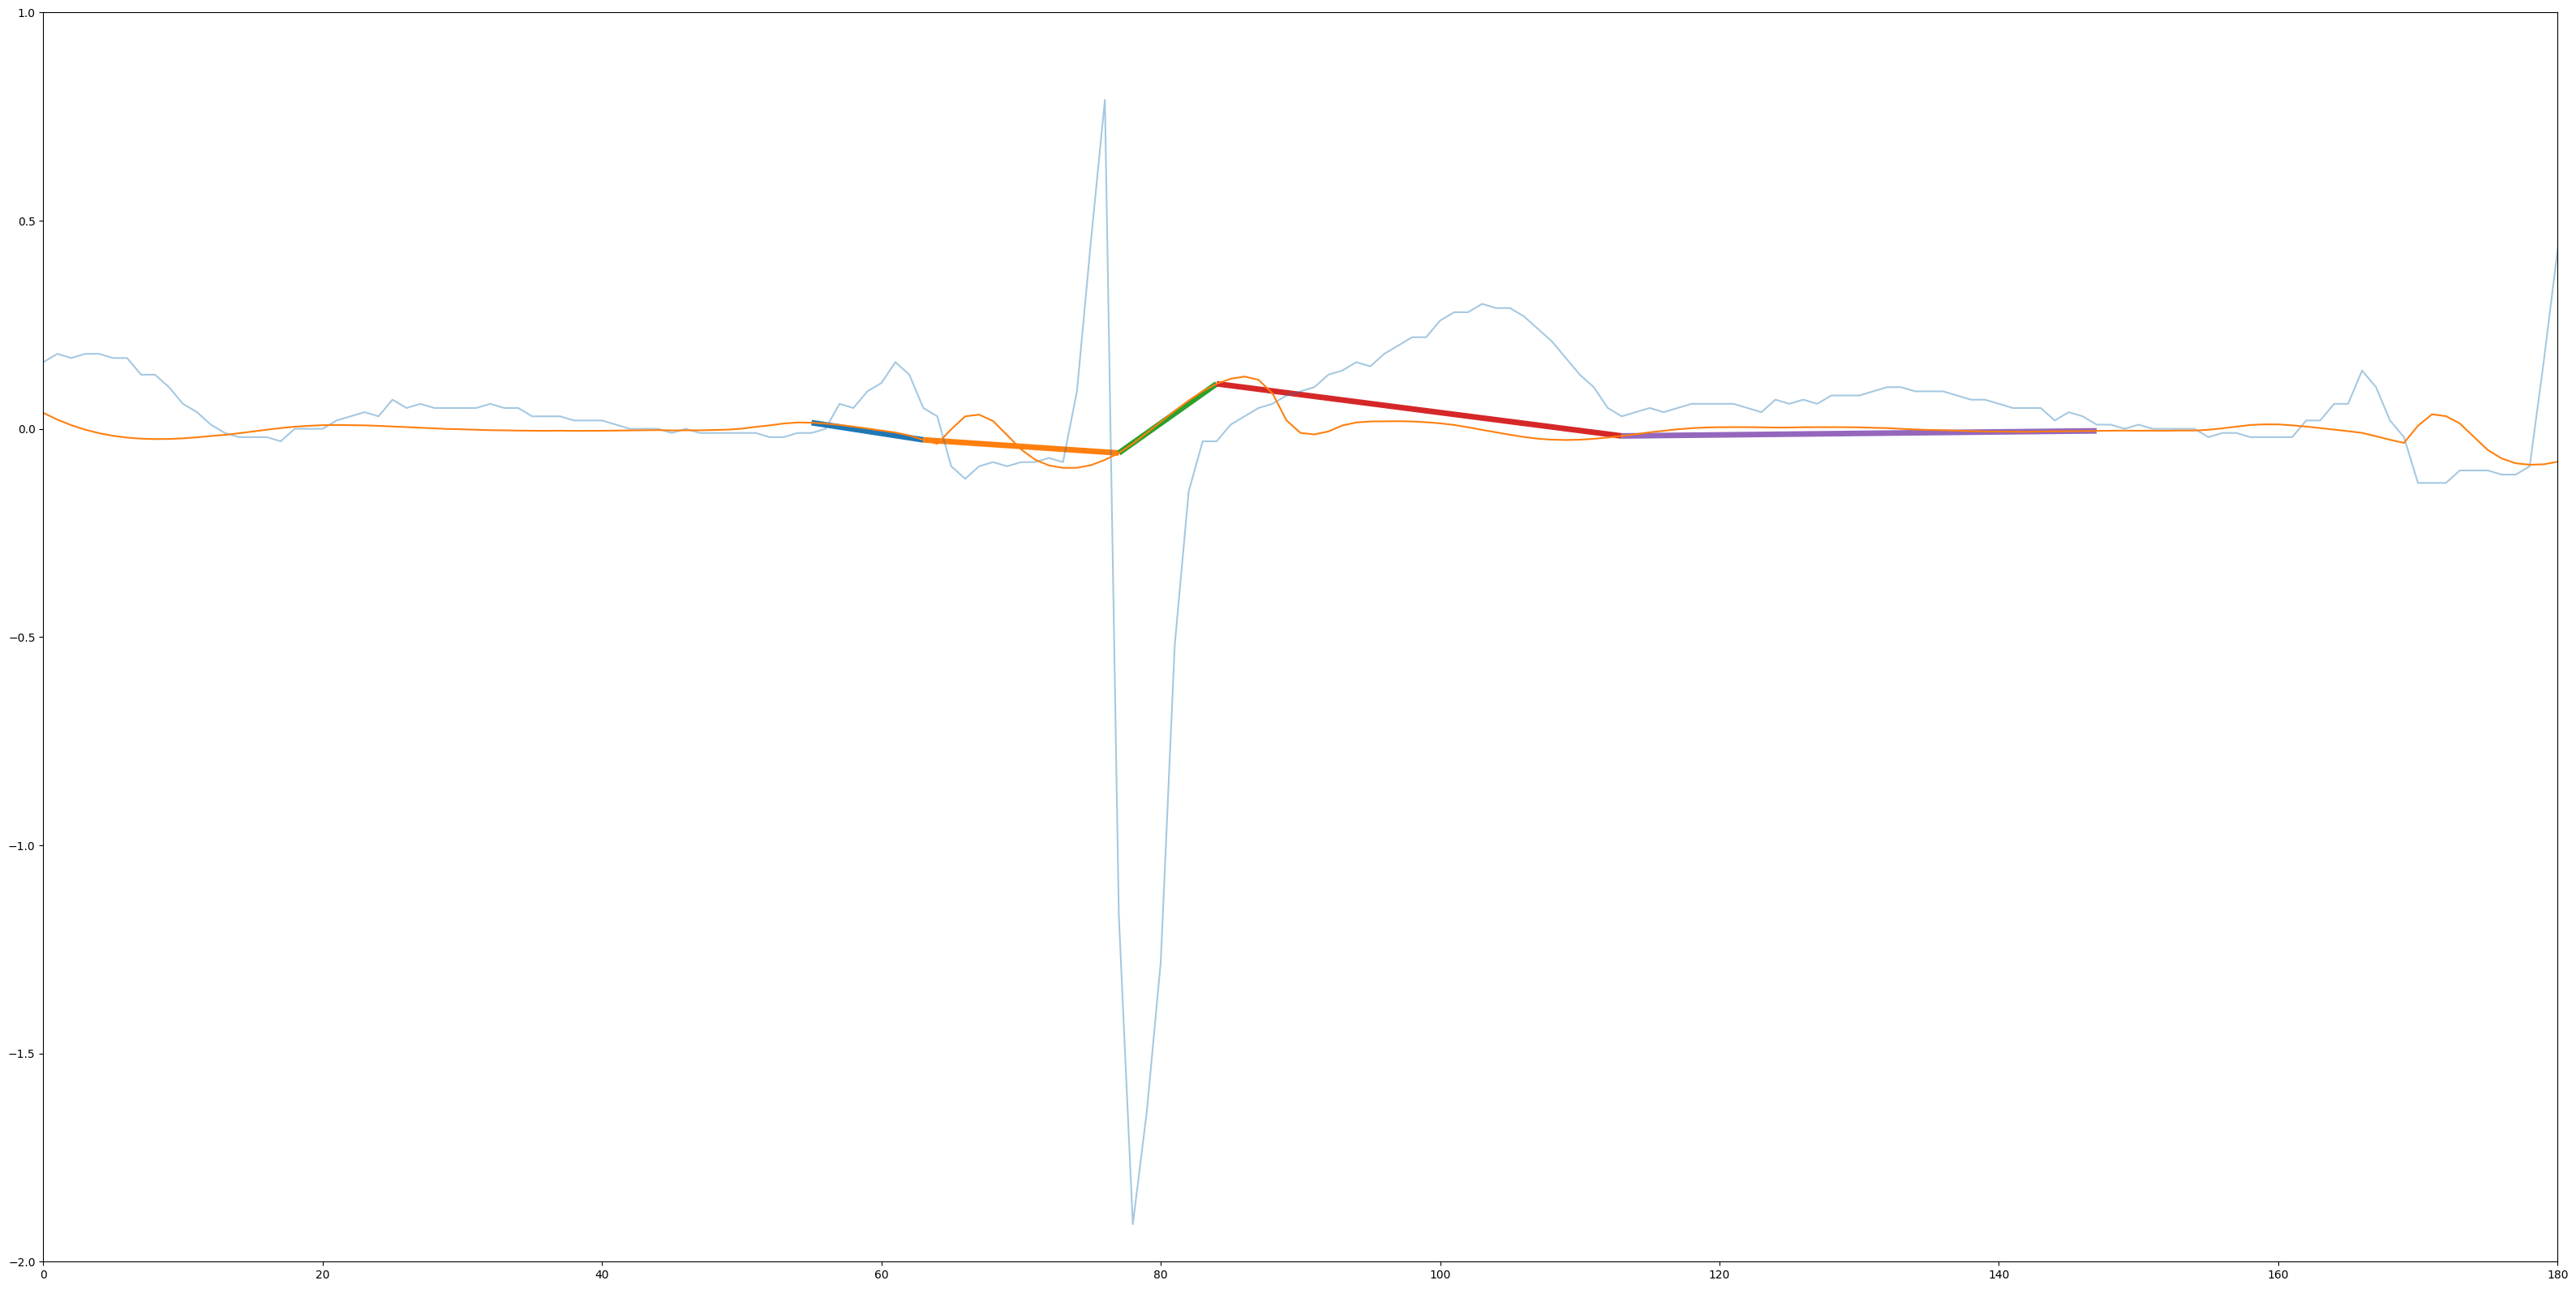

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

lines = []

x_values = [55, 63]
y_values = [de1[x_values[0]], de1[x_values[1]]]

x_intervals = [[55, 63], [63, 77], [77, 84], [84, 113], [113, 147]]
y_intervals = [[de1[interval[0]], de1[interval][1]] for interval in x_intervals]

for i in range(len(x_intervals)):
  lines.append(list(zip(x_intervals[i], y_intervals[i])))

print(lines)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

line_segments = LineCollection(lines, linewidths=(5, 5, 5, 5),
                               colors=colors, linestyle='solid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(40,20), dpi=100)
# fig, ax = plt.subplots()
ax.add_collection(line_segments)

plt.plot(w0, alpha = 0.4)
plt.plot(de1, alpha = 1)

plt.axis([0, 180,-2, 1])
plt.show()

#### Reference Codes

##### Line

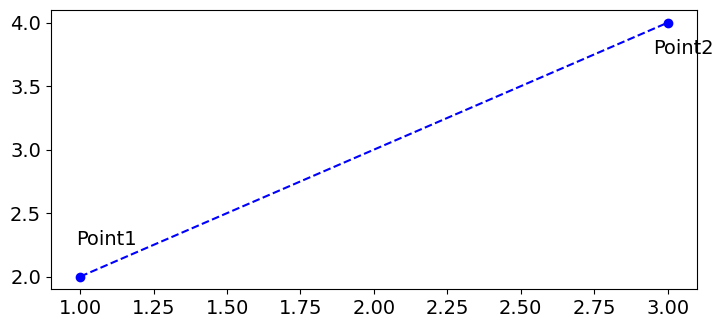

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
point1 = [1, 2]
point2 = [3, 4]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.text(point1[0]-0.015, point1[1]+0.25, "Point1")
plt.text(point2[0]-0.050, point2[1]-0.25, "Point2")
plt.show()

##### Line Collection

[[(7.438147848960258, 9.24467280463044), (7.815727254947889, 4.853549077998233)], [(1.0695792532808046, 9.728214881328029), (9.466053254485715, 5.105231488161969)], [(8.336882549091909, 6.097598890925177), (2.961388766487152, 4.626670812924434)], [(2.882123043293734, 1.098620254271011), (5.017528389676311, 6.89815554109806)], [(9.592900661293145, 6.125011779123522), (6.749102798741681, 5.244829014433364)]]


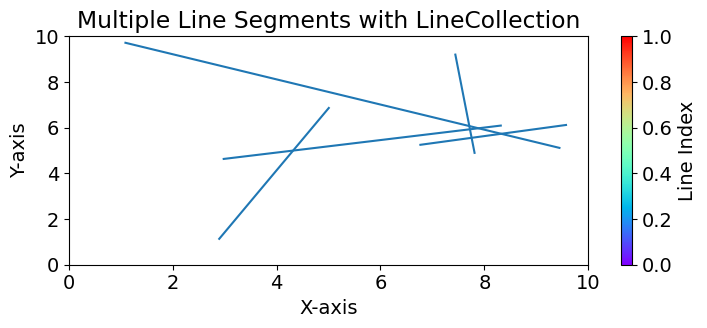

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Generate some random line segments
num_lines = 5
lines = []

for _ in range(num_lines):
    x = np.random.rand(2) * 10  # Two random x-coordinates
    y = np.random.rand(2) * 10  # Two random y-coordinates
    lines.append(list(zip(x, y)))

print(lines)

# Convert the list of lines to LineCollection
lc = LineCollection(lines, cmap=plt.cm.rainbow)

# Create a figure and axis
fig, ax = plt.subplots()

# Add the LineCollection to the axis
ax.add_collection(lc)

# Set the axis limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Add colorbar
cb = plt.colorbar(lc, ax=ax)
cb.set_label('Line Index')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Segments with LineCollection')

# Show the plot
plt.show()